In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_director_movie = pd.read_csv('../../data/movie_directors.csv')
df_rating = pd.read_csv('../../data/oscar_movies.csv')

#df_rating way to small
len(df_rating), len(df_director_movie)

(284, 19618)

In [ ]:
#everything in lower caps to merge
df_director_movie['primaryTitle'] = df_director_movie['primaryTitle'].str.lower()
df_director_movie['originalTitle'] = df_director_movie['originalTitle'].str.lower()

In [ ]:
df = pd.merge(df_director_movie, df_rating, on='primaryTitle', how='inner')

#drop useless columns for this task
df.drop(columns=['countries_y', 'revenue', 'titleType', 'isAdult', 'runtimeMinutes', 'CMU_genres', 'release', 'IMDB_genres'], inplace=True)
df = df.dropna(subset=['box_office_revenue'])

df

,Unnamed: 0,primaryTitle,release_date,box_office_revenue,languages,countries_x,tconst,originalTitle,genres,directors,averageRating,numVotes,runtime,oscar_category,oscar_year,winner
0,24,mary poppins,1964-08-27,102272727.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",tt0058331,mary poppins,"Comedy,Family,Fantasy",Robert Stevenson,7.8,189079,139.0,best picture,1965,False
1,175,midnight express,1978-08-31,35000000.0,"{""/m/064_8sq"": ""French Language"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America"", ""/m/...",tt0077928,midnight express,"Biography,Crime,Drama",Alan Parker,7.5,89602,121.0,best picture,1979,False
2,1084,my fair lady,1964-10-21,72000000.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",tt0058385,my fair lady,"Drama,Family,Musical",George Cukor,7.7,103186,172.0,best picture,1965,True
3,1089,my fair lady,1964-10-21,72000000.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",tt10214520,my fair lady,Musical,Razvan Dinca,7.7,103186,172.0,best picture,1965,True
4,1278,the killing fields,1984,34700291.0,"{""/m/064_8sq"": ""French Language"", ""/m/01lqm"": ...","{""/m/07ssc"": ""United Kingdom""}",tt0087553,the killing fields,"Biography,Drama,History",Roland Joffé,7.8,60506,142.0,best picture,1985,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,102225,field of dreams,1989-04-21,84431625.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",tt19409496,field of dreams,Documentary,Nat Prinzi,7.5,131575,107.0,best picture,1990,False
808,102231,field of dreams,1989-04-21,84431625.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",tt32843748,field of dreams,Documentary,Tanvi Jain,7.5,131575,107.0,best picture,1990,False
809,102765,apollo 13,1995-06-22,355237933.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",tt0112384,apollo 13,"Adventure,Drama,History",Ron Howard,7.7,320815,140.0,best picture,1996,False
810,102794,babe,1995-08-04,254134910.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...",tt0083606,babe,"Adult,Romance",John Christopher,6.9,136528,89.0,best picture,1996,False


In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
years = df['release_date'].dt.year
first_year = years.min()
last_year = years.max()


#keep revenue per actor every year to estimate the director's popularity at the oscar year
director_revenue_year = {}

#mean cumulative sum for each year to measure popularity at the given year
for year in range(int(first_year), int(last_year)+1, 1):
    df_year = df[df['release_date'].dt.year <= year]
    director_revenue = df_year.groupby(['directors'])['box_office_revenue'].mean()
    director_revenue_year[year] = director_revenue



### How many times did the most popular director win ?

In [62]:

count = 0
count_nz = 0

for year in range(int(first_year), int(last_year)+1, 1):

    df_year = df[df['release_date'].dt.year == year]

    if len(df_year):
        count_nz +=1

    most_pop = director_revenue_year[year].idxmax()
    winner = df_year[(df_year['winner']) & (df_year['directors'] == most_pop)]
    if len(winner):
        count +=1



print(f'the most popular director won {count} times from {first_year} to {last_year}, that represents {100*count/count_nz}% of the years we have data for')

the most popular director won 3 times from 1944.0 to 2012.0, that represents 4.6875% of the years we have data for


### Correlation between user ratings and winning an oscar

2 1


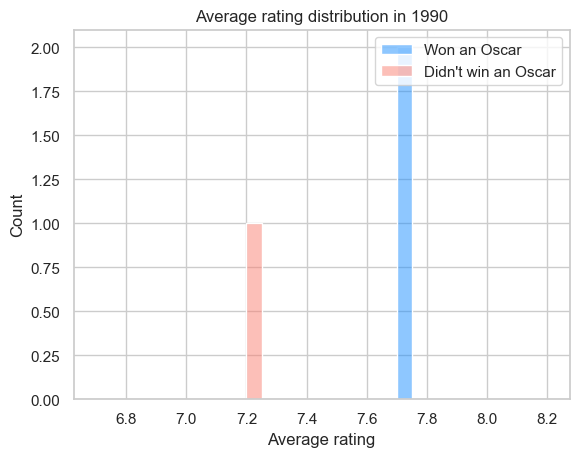

In [52]:
selected_year = 1990

df_year = df[df['release_date'].dt.year == year]
won_rating = df_year[df_year['winner']]['averageRating'].values
lost_rating = df_year[~df_year['winner']]['averageRating'].values
print(len(won_rating), len(lost_rating))


sns.set(style="whitegrid")

sns.histplot(won_rating, bins=20, color='dodgerblue', label='Won an Oscar', alpha=0.5)
sns.histplot(lost_rating, bins=20, color='salmon', label="Didn't win an Oscar", alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('Average rating')
plt.title(f'Average rating distribution in {selected_year}')

plt.show()

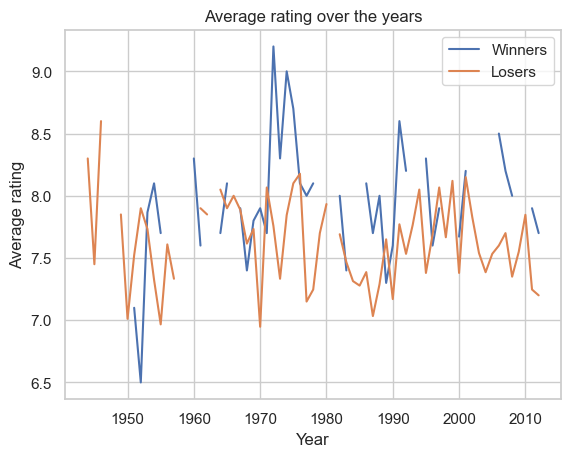

In [ ]:
years = range(int(first_year), int(last_year)+1, 1)
mean_rating_win = []
mean_rating_lose = []



for year in years:

    df_year = df[df['release_date'].dt.year == year]

    won_rating_mean = df_year[df_year['winner']]['averageRating'].mean()
    lost_rating_mean = df_year[~df_year['winner']]['averageRating'].mean()
    mean_rating_win.append(won_rating_mean)
    mean_rating_lose.append(lost_rating_mean)


#lot of missing years
plt.plot(years, mean_rating_win, label='Winners')
plt.plot(years, mean_rating_lose, label='Losers')

plt.title('Average rating over the years')
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Average rating')
plt.show()


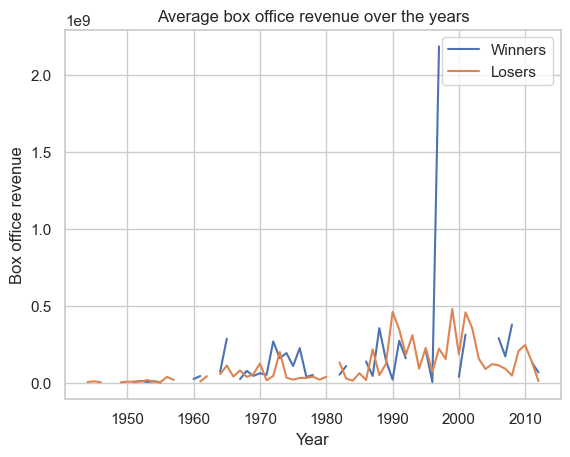

In [66]:
mean_revenue_win = []
mean_revenue_lose = []



for year in years:

    df_year = df[df['release_date'].dt.year == year]

    won_revenue_mean = df_year[df_year['winner']]['box_office_revenue'].mean()
    lost_revenue_mean = df_year[~df_year['winner']]['box_office_revenue'].mean()
    mean_revenue_win.append(won_revenue_mean)
    mean_revenue_lose.append(lost_revenue_mean)


#lot of missing years
plt.plot(years, mean_revenue_win, label='Winners')
plt.plot(years, mean_revenue_lose, label='Losers')

plt.title('Average box office revenue over the years')
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Box office revenue')
plt.show()

### Blockers

* Not enough data
* volatility among years for comparison of distribution: statistical test for each year?